<a href="https://colab.research.google.com/github/saddarudin/google_colab/blob/main/dl_handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [25]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
len(x_train)

60000

In [26]:
len(x_test)

10000

In [27]:
x_train[0].shape

(28, 28)

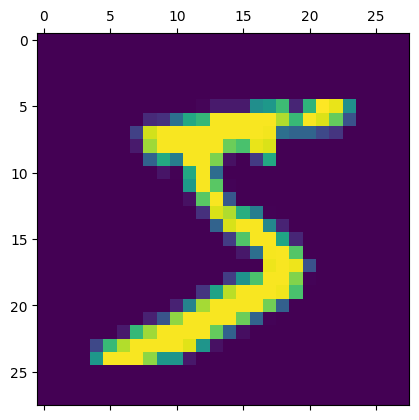

In [28]:
plt.matshow(x_train[0])
plt.show()

In [29]:
y_train[0]

np.uint8(5)

### Scalling the dataset

In [30]:
x_train = x_train/255
x_test = x_test/255

In [31]:
a,b,c = x_train.shape
INPUT_SHAPE = b*c
a,INPUT_SHAPE

(60000, 784)

In [32]:
x_train_flatten = x_train.reshape(a,INPUT_SHAPE)
x_train_flatten.shape

(60000, 784)

In [33]:
a=x_test.shape[0]
a,

(10000,)

In [34]:
x_test_flatten = x_test.reshape(a,INPUT_SHAPE)
x_test_flatten.shape

(10000, 784)

In [35]:
x_test_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [36]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(INPUT_SHAPE,),activation='sigmoid',)
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8153 - loss: 0.7113
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9132 - loss: 0.3110
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9180 - loss: 0.2934
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9216 - loss: 0.2762
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9276 - loss: 0.2629


In [37]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9133 - loss: 0.3030


[0.2659653425216675, 0.9248999953269958]

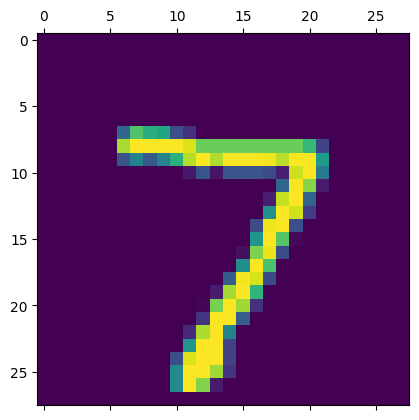

In [38]:
plt.matshow(x_test[0])

In [41]:
y_predicted = model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [42]:
y_predicted[0]

array([1.7404409e-02, 3.4675327e-07, 6.2048513e-02, 9.4992924e-01,
       2.2117193e-03, 7.2702549e-02, 1.9854190e-06, 9.9979448e-01,
       9.2987545e-02, 6.4836091e-01], dtype=float32)

In [43]:
np.argmax(y_predicted[0])

np.int64(7)

## The above number 7 means the maximum probability is at index 7 and we know at 7th index actual number is 7 as 0th index for zero so 7th index for 7 as there are total 10 categories 0 to 9

In [44]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [45]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    1,    2,    0,    5,   14,    3,    4,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,    9,  928,   17,    9,    3,   13,   10,   37,    3],
       [   2,    0,   19,  928,    1,   16,    3,    9,   23,    9],
       [   1,    1,    2,    2,  913,    0,   14,    5,    9,   35],
       [   9,    3,    2,   44,   11,  746,   22,    6,   41,    8],
       [   6,    3,    5,    1,    7,    6,  926,    2,    2,    0],
       [   1,    5,   22,    9,    7,    0,    0,  945,    4,   35],
       [   4,   11,    5,   24,    9,   15,   10,   10,  877,    9],
       [   8,    7,    2,   11,   28,    4,    0,   21,    8,  920]],
      dtype=int32)>

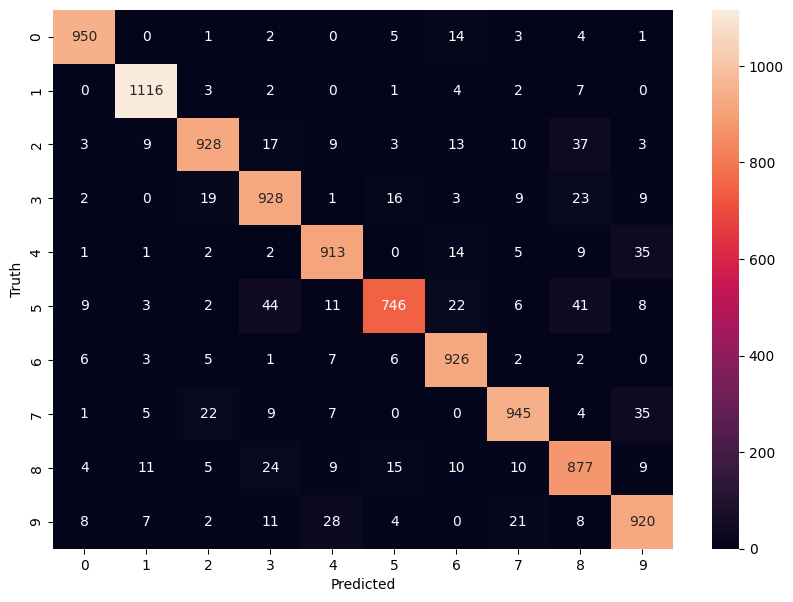

In [46]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()